In [ ]:
# Импортируем модули и библиотеки

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

In [ ]:
# Делим наш датасэт на обучающую и тестовую выборку

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(len(x_test), len(x_train), len(y_test), len(y_train))

10000 60000 10000 60000


In [7]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [8]:
# Предварительная обработка данных

In [9]:
# Посмотрим как выглядят изображения

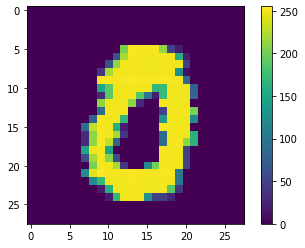

In [10]:
plt.figure()
plt.imshow(x_train[69])
plt.colorbar()
plt.grid(False)

In [11]:
# Нормализация данных

In [12]:
x_train = x_train / 255
x_test = x_test / 255

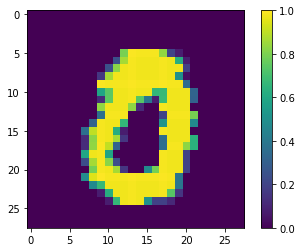

In [13]:
plt.figure()
plt.imshow(x_train[69])
plt.colorbar()
plt.grid(False)

In [14]:
# Посмотрим несколько изображений

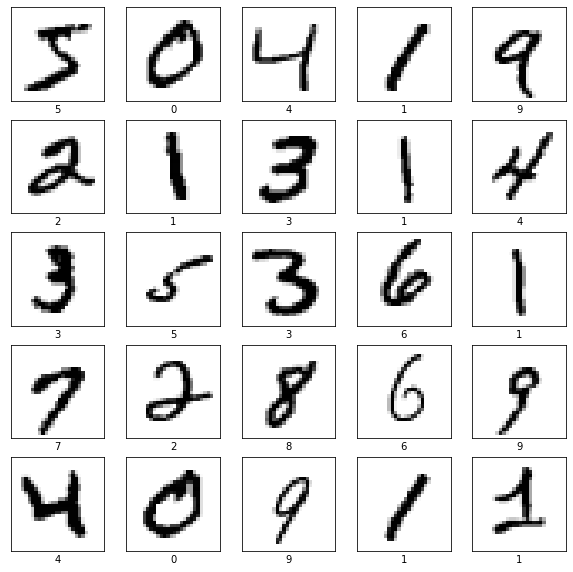

In [15]:
plt.figure(figsize = (10,10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [16]:
# Создание модели нейронной сети

In [61]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # Преобразование 2-мерного массива в 1-мерный массив
                          keras.layers.Dense(128, activation="relu"), 
                          keras.layers.Dense(10, activation="softmax")
])

In [62]:
# Компиляция модели
# optimizer=tf.keras.optimizers.SGD()
# optimizer='rmsprop'

In [63]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Обучение модели

In [78]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.001

In [79]:
# Проверка точности предсказания

In [80]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9790
Test accuracy:  0.9789999723434448


In [81]:
# Предсказания

In [82]:
predictions = model.predict(x_train)

In [83]:
pred_num = 5

In [84]:
predictions[pred_num]

array([3.6204175e-25, 5.7310047e-24, 1.0000000e+00, 1.4714264e-19,
       4.3403456e-20, 3.5237261e-20, 1.1801238e-14, 6.7430794e-21,
       6.7213873e-11, 2.2441828e-16], dtype=float32)

In [85]:
np.argmax(predictions[pred_num])

2

In [86]:
y_train[pred_num]

2

In [87]:
class_names[np.argmax(predictions[pred_num])]

'2'

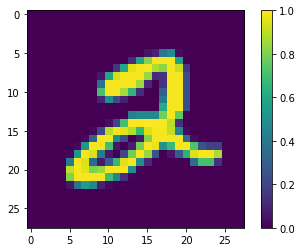

In [88]:
plt.figure()
plt.imshow(x_train[pred_num])
plt.colorbar()
plt.grid(False)